In [81]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np

In [107]:
output_dir = '/data/nriemer/d/sf20/les_output/wrf-partmc/slurm-1851099'
data = nc.Dataset(output_dir + '/aerosols_d01_2023-06-21_09:00:00')
wrf_data = nc.Dataset(output_dir + '/wrfout_d01_2023-06-21_09:00:00')
wrfinput = nc.Dataset(output_dir + '/wrfinput_d01')
aero_dist = nc.Dataset(output_dir + '/aerosol_dist_d01_2023-06-21_09:00:00')


In [ ]:
[var for var in data.variables.keys()]

In [106]:
data['o3'][0, 0, :, :].max()

50.0

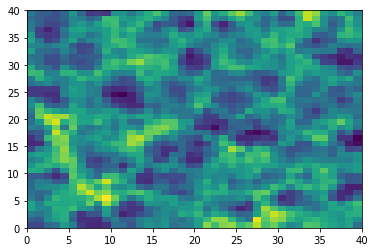

In [109]:
plt.pcolormesh(data['o3'][-1, 0, :, :])

In [127]:
data['pmc_NO3']

<class 'netCDF4._netCDF4.Variable'>
float32 pmc_NO3(Time, bottom_top, south_north, west_east)
    FieldType: 104
    MemoryOrder: XYZ
    description: NO3, total mass
    units: total mass
    stagger: 
    coordinates: XLONG XLAT XTIME
unlimited dimensions: Time
current shape = (4, 100, 40, 40)
filling on, default _FillValue of 9.969209968386869e+36 used

[Text(0, 0, '0.0'),
 Text(0, 25, '0.5'),
 Text(0, 50, '1.0'),
 Text(0, 75, '1.5'),
 Text(0, 100, '2.0')]

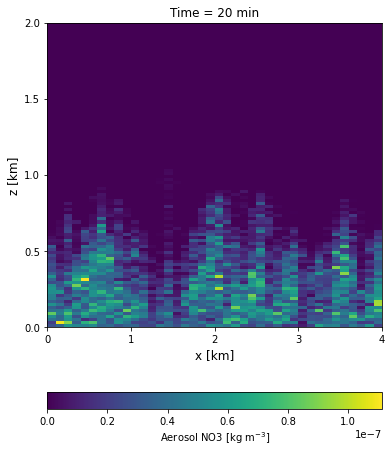

In [131]:
x_dim = 40
z_dim = 100
fig, ax = plt.subplots(1,1, figsize=(6,8))
c = ax.pcolormesh(data['pmc_NO3'][-1, :,:, 20])
fig.colorbar(c, orientation='horizontal', label='Aerosol NO3 [kg m$^{-3}$]')
ax.set_title(f'Time = 20 min')
ax.set_xlabel('x [km]', fontsize=12)
ax.set_ylabel('z [km]', fontsize=12)
ax.set_xticks(np.arange(0, x_dim+1, 10))
ax.set_xticklabels(np.arange(0, 5, 1))
ax.set_yticks(np.arange(0, z_dim+1, 25))
ax.set_yticklabels(np.linspace(0, 2, 5).round(2))

In [92]:
wrfinput['so2']

<class 'netCDF4._netCDF4.Variable'>
float32 so2(Time, bottom_top, south_north, west_east)
    FieldType: 104
    MemoryOrder: XYZ
    description: SO2 mixing ratio
    units: ppmv
    stagger: 
    coordinates: XLONG XLAT XTIME
unlimited dimensions: Time
current shape = (1, 100, 40, 40)
filling on, default _FillValue of 9.969209968386869e+36 used

In [103]:
wrfinput['so2'][0, :, :, :].max()

0.8

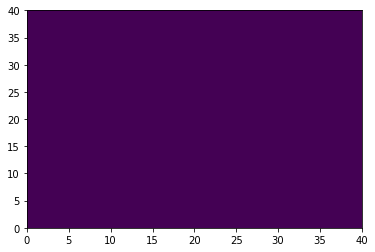

In [104]:
plt.pcolormesh(wrfinput['o3'][0, 0, :, :])

Number distribution

In [ ]:
i = 20
j = 20
k = 25

for time in [15, 20, 25, 30]:
    x_vals = []
    bin_vals = []

    bin_edges = data['BIN_EDGES'][:].data[0]
    bin_width = bin_edges[1:] - bin_edges[:-1]

    for bin_idx in range(100):
        bin_idx += 1 # 1 indexing 
        bin_data = aero_dist[f'num_a{str(bin_idx).zfill(3)}'][time, k, j, i].data.item()/1e6
        bin_vals.append(bin_data)
        x_vals.append(bin_idx)

    plt.plot(data['BIN_CENTERS'][:].data[0], bin_vals, label=f't={2*time}')
    plt.xscale('log')
plt.xlim(5e-9, 5e-6)
plt.legend()
plt.ylabel('Number concentration [m$^{-3}$]')
plt.xlabel('Diameter [m]')

In [67]:
wrfinput = nc.Dataset('/data/keeling/a/sf20/b/wrf-partmc-spatial-het/WRFV3/test/em_les/wrfinput_d01', 'r')
wrfinput_unmod = nc.Dataset('/data/keeling/a/sf20/b/wrf-partmc-spatial-het/WRFV3/test/em_les/wrfinput_d01_unmodifed', 'r+')


FileNotFoundError: [Errno 2] No such file or directory: b'/data/keeling/a/sf20/b/wrf-partmc-spatial-het/WRFV3/test/em_les/wrfinput_d01'

In [49]:
wrfinput

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    TITLE:  OUTPUT FROM IDEAL V3.9.1.1 PREPROCESSOR
    START_DATE: 2023-06-21_09:00:00
    SIMULATION_START_DATE: 2023-06-21_09:00:00
    WEST-EAST_GRID_DIMENSION: 41
    SOUTH-NORTH_GRID_DIMENSION: 41
    BOTTOM-TOP_GRID_DIMENSION: 101
    DX: 100.0
    DY: 100.0
    GRIDTYPE: C
    DIFF_OPT: 2
    KM_OPT: 2
    DAMP_OPT: 0
    DAMPCOEF: 0.1
    KHDIF: 1.0
    KVDIF: 1.0
    MP_PHYSICS: 0
    RA_LW_PHYSICS: 0
    RA_SW_PHYSICS: 0
    SF_SFCLAY_PHYSICS: 0
    SF_SURFACE_PHYSICS: 0
    BL_PBL_PHYSICS: 0
    CU_PHYSICS: 0
    SF_LAKE_PHYSICS: 0
    CHEM_ADV_OPT: 2
    H_SCA_ADV_ORDER: 5
    SURFACE_INPUT_SOURCE: 3
    SST_UPDATE: 0
    GRID_FDDA: 0
    GFDDA_INTERVAL_M: 0
    GFDDA_END_H: 0
    GRID_SFDDA: 0
    SGFDDA_INTERVAL_M: 0
    SGFDDA_END_H: 0
    HYPSOMETRIC_OPT: 2
    USE_THETA_M: 1
    USE_MAXW_LEVEL: 0
    USE_TROP_LEVEL: 0
    GWD_OPT: 0
    SF_URBAN_PHYSICS: 0
    SF_OCEAN_PHYSICS: 0
   

In [50]:
wrfinput_unmod

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    TITLE:  OUTPUT FROM IDEAL V3.9.1.1 PREPROCESSOR
    START_DATE: 2023-06-21_09:00:00
    SIMULATION_START_DATE: 2023-06-21_09:00:00
    WEST-EAST_GRID_DIMENSION: 41
    SOUTH-NORTH_GRID_DIMENSION: 41
    BOTTOM-TOP_GRID_DIMENSION: 101
    DX: 100.0
    DY: 100.0
    GRIDTYPE: C
    DIFF_OPT: 2
    KM_OPT: 2
    DAMP_OPT: 0
    DAMPCOEF: 0.1
    KHDIF: 1.0
    KVDIF: 1.0
    MP_PHYSICS: 0
    RA_LW_PHYSICS: 0
    RA_SW_PHYSICS: 0
    SF_SFCLAY_PHYSICS: 0
    SF_SURFACE_PHYSICS: 0
    BL_PBL_PHYSICS: 0
    CU_PHYSICS: 0
    SF_LAKE_PHYSICS: 0
    CHEM_ADV_OPT: 2
    H_SCA_ADV_ORDER: 5
    SURFACE_INPUT_SOURCE: 3
    SST_UPDATE: 0
    GRID_FDDA: 0
    GFDDA_INTERVAL_M: 0
    GFDDA_END_H: 0
    GRID_SFDDA: 0
    SGFDDA_INTERVAL_M: 0
    SGFDDA_END_H: 0
    HYPSOMETRIC_OPT: 2
    USE_THETA_M: 1
    USE_MAXW_LEVEL: 0
    USE_TROP_LEVEL: 0
    GWD_OPT: 0
    SF_URBAN_PHYSICS: 0
    SF_OCEA

In [58]:
wrfinput_unmod['so2'][0, :, :, :] = np.zeros((100, 40, 40))

# modify ground level values
wrfinput_unmod['so2'][0, 0, :, :] = 10

wrfinput_unmod.close()

In [66]:
wrfinput_unmod['so2'][0, 0, :, :]


masked_array(
  data=[[10., 10., 10., ..., 10., 10., 10.],
        [10., 10., 10., ..., 10., 10., 10.],
        [10., 10., 10., ..., 10., 10., 10.],
        ...,
        [10., 10., 10., ..., 10., 10., 10.],
        [10., 10., 10., ..., 10., 10., 10.],
        [10., 10., 10., ..., 10., 10., 10.]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)